In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
#Covid-19 vaccine ingredients


# Assign colum names to the dataset
names = ['potassium chloride',"monobasic potassium phosphate","sodium chloride","dibasic sodium phosphate dihydrate","phase"]

# Read dataset to pandas dataframe
dataset = pd.read_csv("W:/vaccine.csv", names=names)


print(dataset)

     potassium chloride  monobasic potassium phosphate  sodium chloride  \
0                   1.5                            2.3              0.2   
1                   1.2                            3.2              0.1   
2                   1.4                            6.2              0.2   
3                   2.0                            3.4              0.4   
4                   1.7                            3.2              0.2   
..                  ...                            ...              ...   
145                 2.5                            3.6              0.7   
146                 1.4                            2.6              0.4   
147                 2.6                            1.8              0.3   
148                 2.4                            1.6              0.4   
149                 1.5                            2.3              0.2   

     dibasic sodium phosphate dihydrate  phase  
0                                   4.5    two  
1

In [87]:
dataset.head()

,potassium chloride,monobasic potassium phosphate,sodium chloride,dibasic sodium phosphate dihydrate,phase
0,1.5,2.3,0.2,4.5,two
1,1.2,3.2,0.1,3.6,three
2,1.4,6.2,0.2,3.5,three
3,2.0,3.4,0.4,3.7,one
4,1.7,3.2,0.2,4.3,three


In [88]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
y_pred = classifier.predict(X_test)


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  2  0]
 [ 1 11  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

         one       0.86      0.75      0.80         8
       three       0.85      0.85      0.85        13
         two       0.90      1.00      0.95         9

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.86        30
weighted avg       0.87      0.87      0.86        30



In [94]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

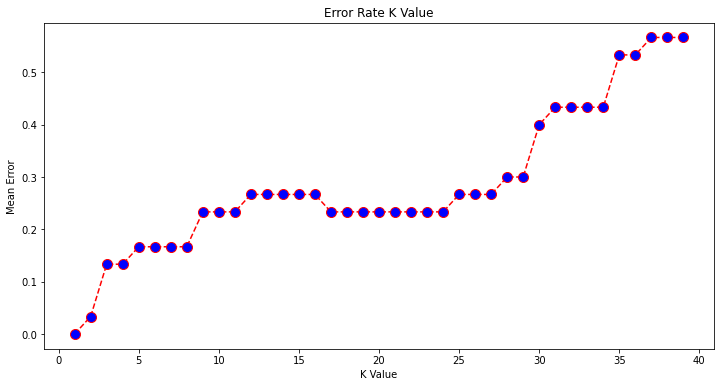

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [96]:
from sklearn.metrics import accuracy_score
print("Accuracy score=", accuracy_score(y_test, y_pred))

Accuracy score= 0.8666666666666667
